In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

train loss:2.300102334582607
=== epoch:1, train acc:0.133, test acc:0.155 ===
train loss:2.2981702347251436
train loss:2.2939367625250267
train loss:2.2863446117813937
train loss:2.2833712081528548
train loss:2.2668293984318435
train loss:2.25226397972525
train loss:2.2396415725767995
train loss:2.2348598883422106
train loss:2.1790078580065773
train loss:2.15935317212858
train loss:2.119334688960906
train loss:2.1200277961700986
train loss:2.0629845995146483
train loss:2.0338247686808075
train loss:1.968877135584647
train loss:1.9252926909341108
train loss:1.846345235432279
train loss:1.7867366500223105
train loss:1.6832905325235423
train loss:1.4425110777511911
train loss:1.467345658647517
train loss:1.5394548207929184
train loss:1.3271814609289259
train loss:1.2488915224099735
train loss:1.3189710585376022
train loss:1.1912316321385648
train loss:1.0143565163125456
train loss:0.9331763560709194
train loss:1.008318665752091
train loss:0.8904811313692086
train loss:0.8575942627400817
t

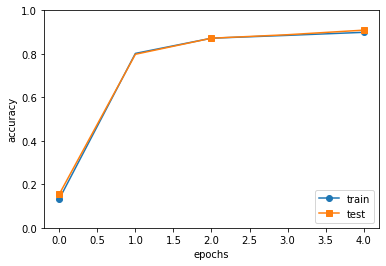

In [2]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()